In [1]:
import serial
import time
import csv
import matplotlib
matplotlib.use("tkAgg")
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [ ]:

ser = serial.Serial()
ser.port = 'COM6' 
ser.baudrate = 115200
ser.timeout = 10 #specify timeout when using readline()
ser.open()

if ser.is_open==True:
    print("\nAll right, serial port now open. Configuration:\n")
    print(ser, "\n") #print serial parameters
    time.sleep(5)

plot_window = 200

currentcourses = np.array(np.zeros([plot_window]))
steeringangles = np.array(np.zeros([plot_window]))

plt.ion()
fig, ax = plt.subplots()
currentcourses_line, = ax.plot(currentcourses)
steeringangles_line, = ax.plot(steeringangles)



while True:
    try:
        ser_bytes = ser.readline()
        try:
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            desiredcourse, currentcourse, steeringangle = decoded_bytes.split(' ')

            desiredcourse, currentcourse, steeringangle = float(desiredcourse), float(currentcourse), float(-steeringangle)
            print(desiredcourse, currentcourse, steeringangle)
        except:
            continue


        currentcourses = np.append(currentcourse,)
        currentcourses = currentcourses[1:plot_window+1]
        currentcourses_line.set_ydata(currentcourses)

        steeringangles = np.append(steeringangle,)
        steeringangles = steeringangles[1:plot_window+1]
        steeringangles_line.set_ydata(steeringangles)

        ax.set_ylim(bottom=-180.0,top=180.0)
        #ax.relim()
        #ax.autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()
    except Exception as err:
        print("Keyboard Interrupt", err)
        ser.close()
        break

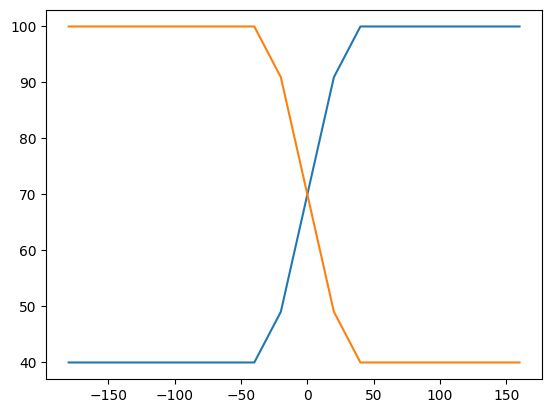

In [44]:
from math import radians
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

steer_gain = 4  
v_in_min = 0
v_in_max = 2
pwm_out_min = 40
pwm_out_max = 100


def drive(steer,surge):
    """
    steer in degrees per second
    surge in meters per second
    """
    
    vl = (2*surge + radians(steer)*steer_gain) / 2
    vr = (2*surge - radians(steer)*steer_gain) / 2

    # clam max and min motor speeds  
    vl = min(v_in_max,vl)
    vl = max(v_in_min,vl)
    vr = min(v_in_max,vr)
    vr = max(v_in_min,vr)

    pwm_left = (vl - v_in_min) * (pwm_out_max - pwm_out_min) / (v_in_max - v_in_min) + pwm_out_min
    pwm_right = (vr - v_in_min) * (pwm_out_max - pwm_out_min) / (v_in_max - v_in_min) + pwm_out_min

    return pwm_left,pwm_right

steeringangles = []
motorrights = []
motorlefts = []

for steeringangle in range(-180,180,20):
    

    steeringangles.append(steeringangle)


    vr,vl = drive(steeringangle,1)

    motorrights.append(vr)
    motorlefts.append(vl) 


plt.plot(steeringangles, motorrights , label='vr' )
plt.plot(steeringangles, motorlefts , label='vl' )

plt.show()

In [10]:
in_min = -180
in_max = 180
out_min = 40
out_max = 100

def remap(x):
  return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min


for steeringangle in range(-180,180,10):

    print(remap(steeringangle))  

40.0
41.666666666666664
43.333333333333336
45.0
46.666666666666664
48.333333333333336
50.0
51.666666666666664
53.333333333333336
55.0
56.66666666666667
58.33333333333333
60.0
61.66666666666667
63.33333333333333
65.0
66.66666666666667
68.33333333333333
70.0
71.66666666666667
73.33333333333334
75.0
76.66666666666666
78.33333333333334
80.0
81.66666666666666
83.33333333333334
85.0
86.66666666666666
88.33333333333334
90.0
91.66666666666666
93.33333333333334
95.0
96.66666666666666
98.33333333333334
